In [1]:
%load_ext jupyter_ai_magics

In [7]:
from datascience import *
import numpy as np


# needed for plotting with datascience module
%matplotlib inline
import matplotlib.pyplot as plots

from IPython.display import display, Image

## Compare Line Plot vs. Scatter Plot

Last time, we looked at a scatter plot.  Recall that a scatter plot can be used to compare one numerical variable with another, with one on the x axis, and another on the y-axis, with one dot per data row.


A line plot is similar; the difference is that the dots are connected.



Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens


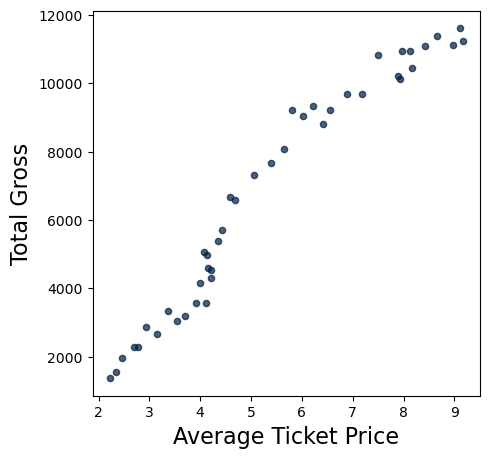

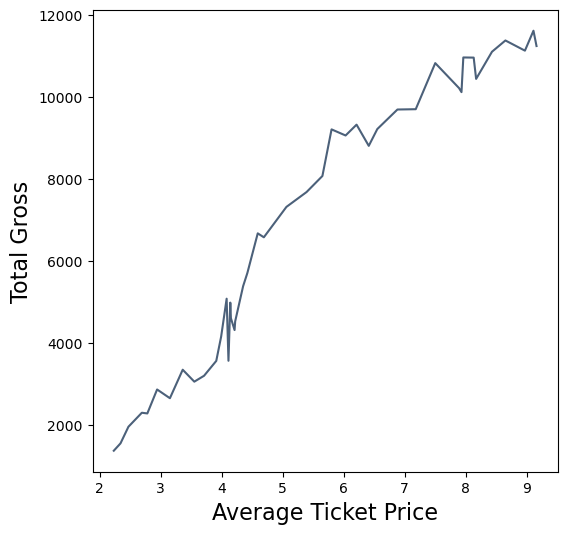

In [10]:
movies = Table.read_table("data/movies_by_year_with_ticket_price.csv")
movies.show(5)

movies.scatter('Average Ticket Price', 'Total Gross')
movies.plot('Average Ticket Price', 'Total Gross')


Lines Plots are often used to see chronological trends/patterns.

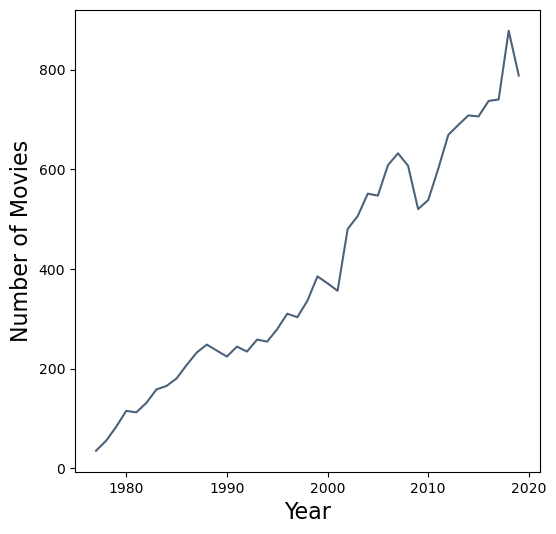

In [11]:
movies.plot('Year', 'Number of Movies')

### Visualizing Categorical Distributions (not numerical data)

Scattter plots and line plots work for numerical data. But sometimes we have categorical data.

Examples of categorical variables:
* Ice cream flavors: Vanilla, Chocolate, Strawberry
* Experience Level: Junior, Intermediate, Expert, Director

Suggested Reading: https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html

For categorical data, we need different kinds of visualizations



#### Bar chart
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

In [12]:
salaries = Table.read_table("data/Latest_Data_Science_Salaries.csv")
salaries.show(5)

salaries_grouped = salaries.group('Expertise Level')
salaries_grouped

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


Expertise Level,count
Director,146
Expert,2065
Intermediate,797
Junior,292


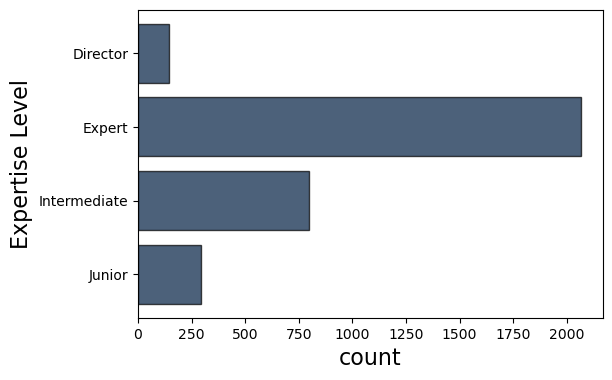

In [30]:
salaries_grouped.barh('Expertise Level', 'count') # or you can also just say salaries_grouped.barh('Expertise Level')

### Visualizing Numerical Distributions
A lot of variables you will come across are quantitative or numerical. Say we want to look at the salaries in the salaries table.

#### Histogram 
A histogram is a visualization of the distribution of a quantitative variable. It looks very much like a bar chart but its different.

First, let us make it easier for us to read the salary data. 

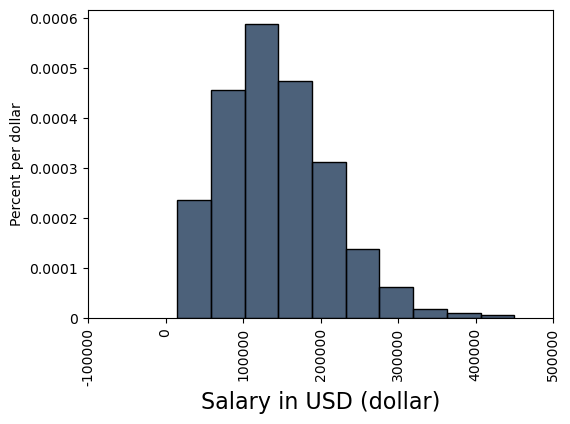

In [67]:
salaries.hist('Salary in USD', unit='dollar')

#### Bins
Now, it is even more interesting to group the values into intervals, known as `bins`, and see how many people are in each bin. This process is called `binning`.

In [61]:
usd_salaries = salaries.column('Salary in USD')
# print(usd_salaries)
min(usd_salaries), max(usd_salaries)

(15000, 450000)

In [66]:
# you can specify a number of bins and that'll lead to that many equally spaced bins
bins_10 = salaries.bin('Salary in USD', bins=10)
bins_10.show()

bin,Salary in USD count
15000,339
58500,655
102000,844
145500,682
189000,449
232500,196
276000,89
319500,25
363000,14
406500,7


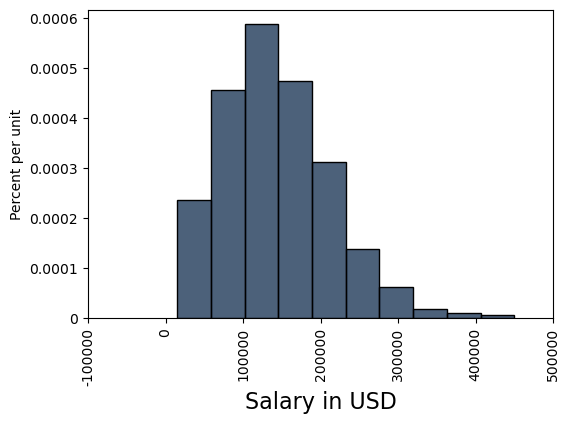

In [83]:
salaries.hist('Salary in USD', bins=10)

In [82]:
# but bin sizes dont have to be equal! 
bins_uneven = salaries.bin('Salary in USD', bins=[15000, 100000, 200000, 500000])
bins_uneven

bin,Salary in USD count
15000,929
100000,1719
200000,652
500000,0


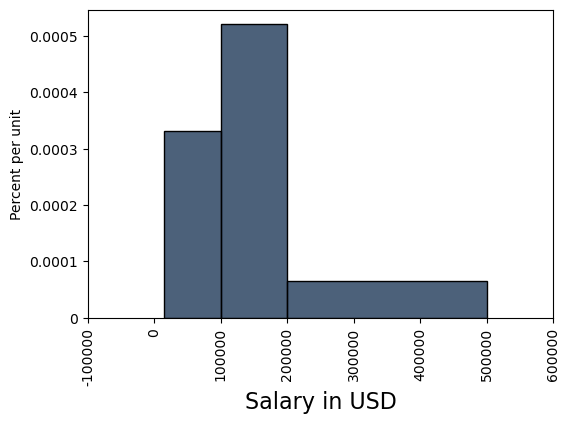

In [84]:
salaries.hist('Salary in USD', bins=[15000, 100000, 200000, 500000])

In [ ]:
# recall that np.arange(start, stop, step) gives us an array of values from start to stop, step apart

In [ ]:
bin_counts = salaries.bin('Salary in USD', bins=np.arange(15000,475000,25000))
bin_counts.show()

bin,Salary in USD count
15000,138
40000,299
65000,360
90000,435
115000,474
140000,453
165000,371
190000,309
215000,166
240000,129


Look at the `bin` column. This column specifies the left end of each bin, except in the last row. Since the bins split the number line into intervals, they are contiguous. 
Each element in the `Salary in USD count` column counts all the Salary in USD values that are greater than or equal to the value in bin, but less than the next value in bin (look at the next row for this value). 

Note that we will use the notation [a, b) to refer to the bin that contains all the values that are greater than or equal to a and strictly less than b. Here, you can tell that there are 138 people in the bin [15000, 40000), i.e. with a Salary in USD value greater than or equal to 15000 but less than 40000!

For the last bin - Look at the bin value 465000 in the last row. That’s not the left endpoint of any bin. Instead, it’s the right endpoint of the last bin. This bin is different from all the others in that it has the form [a, b]. It includes the data at both endpoints. Here, we don't have any Salary in USD value that is 465000. 

Now let's plot again!

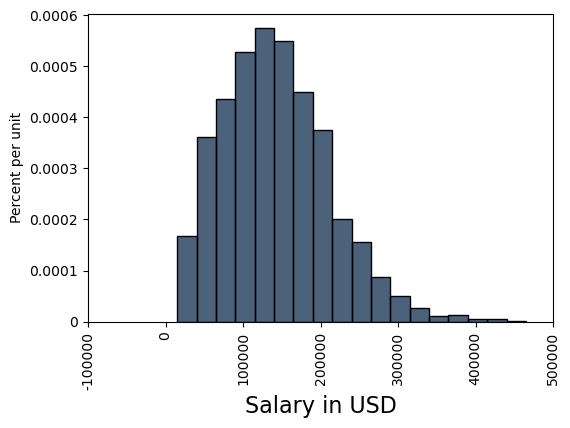

In [65]:
salaries.hist('Salary in USD', bins=np.arange(15000,475000,25000)) # notice that bins is an optional argument

You can see that a lot of people have salaries between 100000 and 200000 and a very small number of them have salaries above 300000. 

#### Area principle and density
The area of each bar of the histogram is proportional to the percent of individuals/entries in the corresponding bin. The total area of all the bars in the histogram is 100%. In terms of proportions, we can say that the areas of all the bars in a histogram “sum to 1”.

The height of the histogram is the area of the bar divided by the width of the bin (remember, bins don't have to be equally spaced!). So the height is called density or crowdedness. 

The reason we plot histograms on a density scale is because it allows us to compare histograms that are based on data sets of different sizes or have different choices of bins.

Let's look at this using our example! There are 138 people in the bin [15000, 40000) and the table salaries contains a total of 3300 people (hint: salaries.num_rows). 

In [85]:
# The first bin contains 4.18 % of all the employees (area is percent of entries in bin)
# 138 is the number of salaries between [15000, 40000].
# 3300 is the number of rows
# multiply by 100 to make it a percentage

138/3300*100

4.181818181818182

In [75]:
# width of the bin is 25000
40000 - 15000

25000

In [80]:
# so the height of the bar is 4.18 % divided by 25000 dollars which is 0.0001672 % per dollar (you can see this is the case in the plot above)
4.18/25000

0.0001672

### How are bar charts and histograms different? Confused?

**Numerical vs Categorical**: Bar charts show a numerical quantity per category (=> used for distributions of _categorical_ variables). Histograms are used for the distributions of _numerical_ variables.

**Bar width**: All the bars in a bar chart have the same width and an equal amount of space between consecutive bars. The bars of a histogram are contiguous and the bins are drawn to scale on the number line. Bins can be unequal in a histogram.

**Counts vs Density**: The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the count in each category. The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the counts in the bins. bins

##### chatgpt time! 
We are going to slowly begin to understand how to use chatgpt to analyze our data!

In [16]:
%%ai openai-chat:gpt-3.5-turbo
What are histograms? I have a loaded a table called salaries. It has a column called 'Salary in USD' that goes from 15000 to 450000. I want to plot a histogram using hist method with reasonable bins. Please explain it like you would to a 5 year old. 

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


Histograms are like bar charts, but instead of showing different categories, they help us understand how data is distributed. Imagine you have a bunch of numbers (salaries in this case), ranging from $15,000 to $450,000. A histogram will show how many salaries fall into different ranges, or what we call "bins".

To plot a histogram using the `hist` method in Python, based on the "Salary in USD" column, we can use the following code:

```python
import datascience as ds
import matplotlib.pyplot as plt

# Read the table called "salaries"
salaries = ds.Table.read_table("salaries.csv")

# Create a histogram using the "hist" method with the "Salary in USD" column
salaries.hist("Salary in USD")
```

The resulting histogram will display the salary ranges (or bins) on the x-axis and the number of salaries falling in each range on the y-axis. Each range will be represented by a bar, with the height of the bar indicating the number of salaries in that particular range.

By looking at the histogram, you can easily see if there are more salaries in higher or lower ranges, or if they are evenly distributed across the range. It gives you a visual understanding of how salaries are distributed within the dataset.

Please note that it's important to choose a reasonable number of bins to ensure the histogram accurately represents the data distribution. The `hist` method will automatically choose a reasonable number of bins based on the range and number of data points.

In [17]:
%%ai openai-chat:gpt-3.5-turbo
That's great. Can you now plot a histogram using hist method and create different bins options? Please explain it like you would to a 5 year old. 

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


Certainly! Let's plot a histogram with different bin options using the `hist` method.

Imagine you have a lot of candies of different sizes, and you want to see how many candies fall into different size ranges. Bins in histograms are like these size ranges. We can choose different bin options to see how the number of candies changes based on the size ranges we select.

```python
import datascience as ds
import matplotlib.pyplot as plt

# Read the table called "salaries"
salaries = ds.Table.read_table("salaries.csv")

# Create a histogram with different bin options using the "hist" method
salaries.hist("Salary in USD", bins=[10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
```

The code above will create a histogram for the "Salary in USD" column and split the range into different bins that we have defined. Here, the bins are represented by the different ranges of salaries, such as $10,000 to $50,000, $50,000 to $100,000, and so on.

The resulting histogram will show how many salaries fall into each bin or range. It gives us a visual representation of how the salaries are distributed in these specific size ranges. By comparing the histograms with different bin options, we can see how the distribution changes based on the size ranges we choose.

It's important to choose appropriate bin options to ensure the histogram provides meaningful insights into the data. For example, if we choose very small bins, we might see a lot of spikes in the histogram, making it difficult to understand the overall pattern. On the other hand, if the bins are too large, we might miss important details in the data distribution.

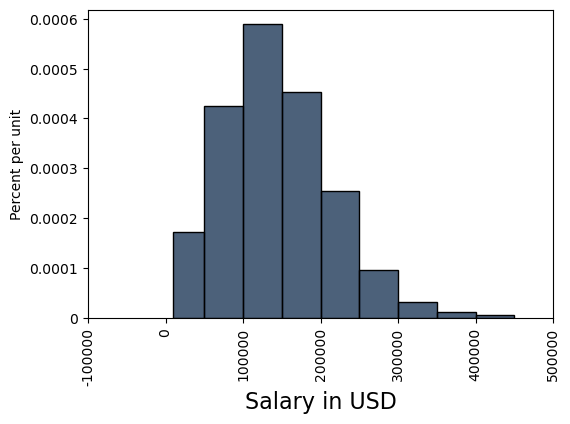

In [18]:
salaries.hist("Salary in USD", bins=[10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

In [16]:
%%ai openai-chat:gpt-3.5-turbo --format code
My salaries table has Job Title, Employment Type, Experience Level, Expertise Level, Salary, Salary Currency, Company Location, Salary in USD, Employee Residence, Company Size and Year. I want to understand how salaries (in USD) are changing with experience levels. Use very simple methods using datascience module in Python correctly.

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


In [18]:
from datascience import *

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by experience level and calculate the average salary
avg_salary_by_experience = salaries_table.group('Experience Level', np.mean)

# Display the average salary by experience level
avg_salary_by_experience

Experience Level,Job Title mean,Employment Type mean,Expertise Level mean,Salary mean,Salary Currency mean,Company Location mean,Salary in USD mean,Employee Residence mean,Company Size mean,Year mean
Entry,,,,202933,,,79921.5,,,2022.15
Executive,,,,237493,,,191512,,,2022.52
Mid,,,,259106,,,108715,,,2022.34
Senior,,,,181573,,,160278,,,2022.6


In [19]:
%%ai openai-chat:gpt-3.5-turbo --format code
Now that we have avg_salary_by_experience, can we plot the Salary in USD mean by Experience Level?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


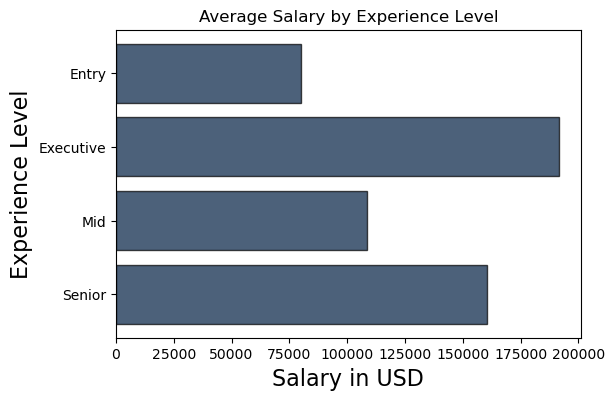

In [20]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by experience level and calculate the average salary
avg_salary_by_experience = salaries_table.group('Experience Level', np.mean)

# Plot the average salary by experience level
avg_salary_by_experience.barh('Experience Level', 'Salary in USD mean')

plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.title('Average Salary by Experience Level')
plt.show()

In [23]:
%%ai openai-chat:gpt-3.5-turbo --format code
I am also interested in understanding how the average Salary in USD changes over the years. Can you plot that?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


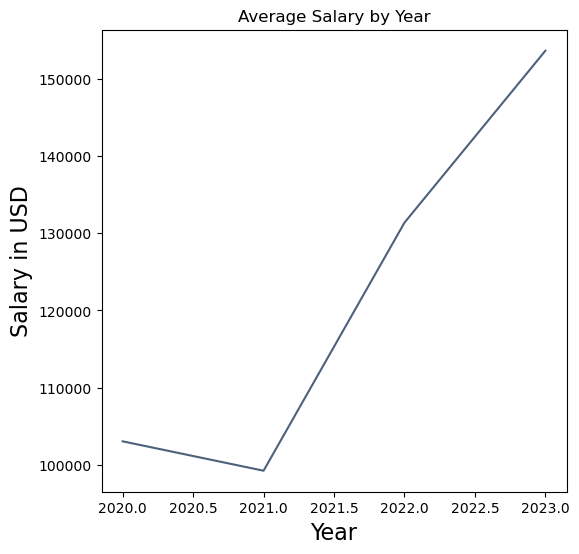

In [22]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by year and calculate the average salary
avg_salary_by_year = salaries_table.group('Year', np.mean)

# Plot the average salary by year
avg_salary_by_year.plot('Year', 'Salary in USD mean')

plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Year')
plt.show()

In [31]:
%%ai openai-chat:gpt-3.5-turbo --format code
It is a bit weird to see decimal values for Year. Can we change the x axis to reflect whole numbers and mark each year in the data with a dot on the plot?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


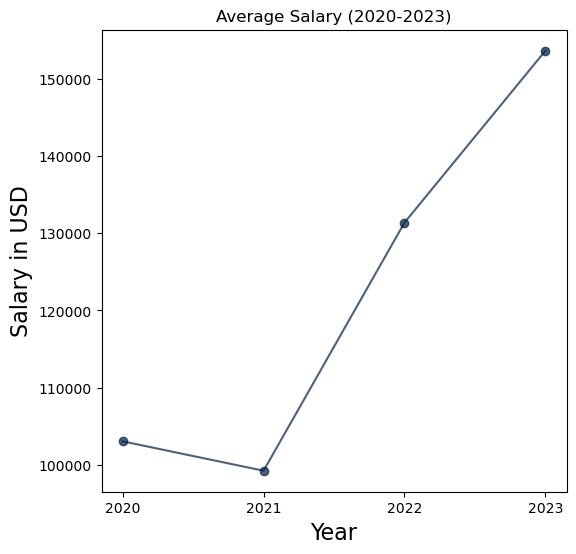

In [33]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Filter the data for years 2020 to 2023
filtered_table = salaries_table.where('Year', are.between_or_equal_to(2020, 2023))

# Group the filtered data by year and calculate the average salary
avg_salary_by_year = filtered_table.group('Year', np.mean)

# Convert the 'Year' column to integer data type
avg_salary_by_year = avg_salary_by_year.with_column('Year', avg_salary_by_year.column('Year').astype(int))

# Plot the average salary by year
avg_salary_by_year.plot('Year', 'Salary in USD mean', marker='o')

plt.xticks(range(2020, 2024))
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Average Salary (2020-2023)')
plt.show()

#### What other interesting questions come to mind? Can you look at the data and think of questions you may want to explore about data science jobs? 